In [22]:
##Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
##Read Data file from Local drive
from google.colab import files
uploaded = files.upload()

Saving Daily OT report 31st July, 2022.xlsx to Daily OT report 31st July, 2022 (1).xlsx


In [12]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Daily OT report 31st July, 2022.xlsx']))
df.head(1)

,Date,Line Number,Style Number,Regular Shift Hours,OT Hours,Number of Worker@regular Hours,Number of Worker@OT Hours,Garments SAM,Production in Regular Hours,Production in OT hours,Productivity @regular hours,Productivy @OT hours,Total Hr,Total Production,Cost in Regular Hrs,Cost in OT,Total Cost,Efficiency Regular hrs,Efficiency including OT hrs
0,2022-06-30,12,2116397-,8,0,40,0,25,420,0,1.3125,0.0,8,420,192.0,0.0,192.0,54.6875,54.6875


# **Getting Into The Data**

In [15]:
df.columns

Index(['Date', 'Line Number', 'Style Number', 'Regular Shift Hours',
       'OT Hours', 'Number of Worker@regular Hours',
       'Number of Worker@OT Hours', 'Garments SAM',
       'Production in Regular Hours', 'Production in OT hours',
       'Productivity @regular hours', 'Productivy @OT hours', 'Total Hr',
       'Total Production', 'Cost in Regular Hrs', 'Cost in OT', 'Total Cost',
       'Efficiency Regular hrs', 'Efficiency including OT hrs',
       'Cost Per Piece Regular hs', 'Cost Per Piece including OT'],
      dtype='object')

In [48]:
df.groupby('Style Number').count()

,Date,Line Number,Regular Shift Hours,OT Hours,Number of Worker@regular Hours,Number of Worker@OT Hours,Garments SAM,Production in Regular Hours,Production in OT hours,Productivity @regular hours,...,Total Hr,Total Production,Cost in Regular Hrs,Cost in OT,Total Cost,Efficiency Regular hrs,Efficiency including OT hrs,Cost Per Piece Regular hs,Cost Per Piece including OT,Cost Per Piece in OT
Style Number,,,,,,,,,,,,,,,,,,,,,
2116397-,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,14


In [49]:
df.tail()

,Date,Line Number,Style Number,Regular Shift Hours,OT Hours,Number of Worker@regular Hours,Number of Worker@OT Hours,Garments SAM,Production in Regular Hours,Production in OT hours,...,Total Hr,Total Production,Cost in Regular Hrs,Cost in OT,Total Cost,Efficiency Regular hrs,Efficiency including OT hrs,Cost Per Piece Regular hs,Cost Per Piece including OT,Cost Per Piece in OT
20,2022-07-25,12,2116397-,8,3,40,35,25,578,169,...,11,747,192.0,126.0,318.0,75.260417,70.738636,0.332180,0.425703,0.745562
21,2022-07-26,12,2116397-,8,3,40,35,25,585,169,...,11,754,192.0,126.0,318.0,76.171875,71.401515,0.328205,0.421751,0.745562
22,2022-07-27,12,2116397-,8,0,36,0,25,602,0,...,8,602,172.8,0.0,172.8,87.094907,87.094907,0.287043,0.287043,NaN
23,2022-07-28,12,2116397-,8,0,36,0,25,605,0,...,8,605,172.8,0.0,172.8,87.528935,87.528935,0.285620,0.285620,NaN
24,2022-07-30,12,2116397-,8,0,36,0,25,606,0,...,8,606,172.8,0.0,172.8,87.673611,87.673611,0.285149,0.285149,NaN


# **Analysing Data**

**Cost Per Piece calculation**
1. Cost Per Piece in Regular Hours
2. Cost Per Piece in OT Hours
3. Cost Per Piece including OT Hours

In [16]:
df['Cost Per Piece Regular hs'] = (df['Cost in Regular Hrs']/df['Production in Regular Hours'])
df['Cost Per Piece including OT'] = (df['Total Cost']/df['Total Production'])
df['Cost Per Piece in OT'] = (df['Cost in OT']/df['Production in OT hours'])
df.head(10)

,Date,Line Number,Style Number,Regular Shift Hours,OT Hours,Number of Worker@regular Hours,Number of Worker@OT Hours,Garments SAM,Production in Regular Hours,Production in OT hours,...,Total Hr,Total Production,Cost in Regular Hrs,Cost in OT,Total Cost,Efficiency Regular hrs,Efficiency including OT hrs,Cost Per Piece Regular hs,Cost Per Piece including OT,Cost Per Piece in OT
0,2022-06-30,12,2116397-,8,0,40,0,25,420,0,...,8,420,192.0,0.0,192.0,54.687500,54.687500,0.457143,0.457143,NaN
1,2022-06-30,11,AM 9834,8,2,43,25,33,345,45,...,10,390,206.4,60.0,266.4,55.159884,49.883721,0.598261,0.683077,1.333333
2,2022-06-30,34,092EO2G316,8,3,51,25,42,655,105,...,11,760,244.8,90.0,334.8,112.377451,94.830660,0.373740,0.440526,0.857143
3,2022-06-30,1,WK 0912(RE),8,2,42,32,44,555,100,...,10,655,201.6,76.8,278.4,121.130952,114.365079,0.363243,0.425038,0.768000
4,2022-06-30,5,WK 0913(RE),8,2,33,35,36,450,103,...,10,553,158.4,84.0,242.4,102.272727,100.545455,0.352000,0.438336,0.815534
5,2022-06-30,4,J-Stockton,8,0,35,0,45,400,0,...,8,400,168.0,0.0,168.0,107.142857,107.142857,0.420000,0.420000,NaN
6,2022-07-02,12,2116397-,8,0,40,0,25,422,0,...,8,422,192.0,0.0,192.0,54.947917,54.947917,0.454976,0.454976,NaN
7,2022-07-03,12,2116397-,8,0,40,0,25,411,0,...,8,411,192.0,0.0,192.0,53.515625,53.515625,0.467153,0.467153,NaN
8,2022-07-04,12,2116397-,8,2,40,30,25,452,79,...,10,531,192.0,72.0,264.0,58.854167,55.312500,0.424779,0.497175,0.911392
9,2022-07-05,12,2116397-,8,2,38,32,25,455,92,...,10,547,182.4,76.8,259.2,62.362939,59.978070,0.400879,0.473857,0.834783


In [20]:
df1 = df[['Cost Per Piece Regular hs','Cost Per Piece including OT','Cost Per Piece in OT']]
df1.head()

,Cost Per Piece Regular hs,Cost Per Piece including OT,Cost Per Piece in OT
0,0.457143,0.457143,NaN
1,0.598261,0.683077,1.333333
2,0.373740,0.440526,0.857143
3,0.363243,0.425038,0.768000
4,0.352000,0.438336,0.815534


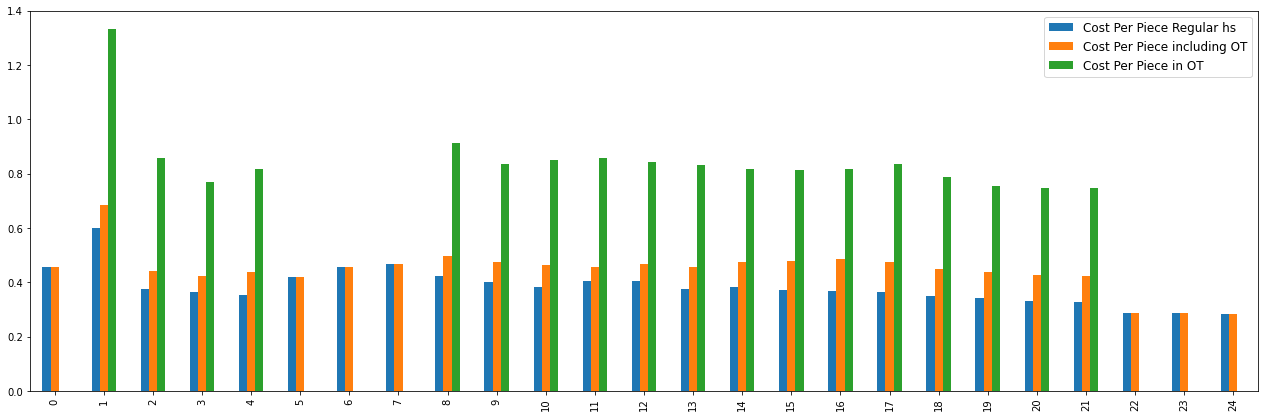

In [38]:
ax = df1.plot.bar(figsize=(22,7))
ax.legend(fontsize = 12)

**Productivity Calculation**
1. Productivity in Per Regular Hours
2. Productivity in Per OT hours

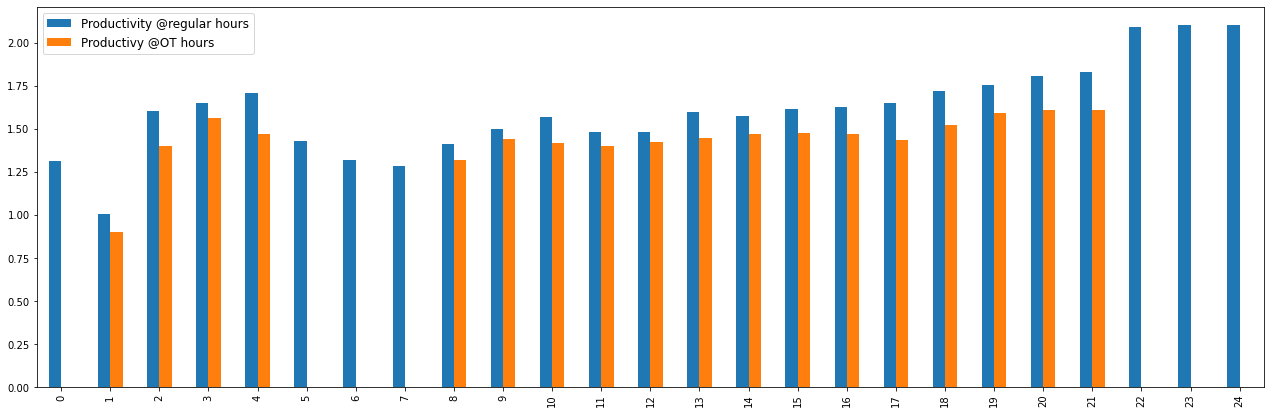

In [42]:
df2=df[['Productivity @regular hours','Productivy @OT hours']]
ax = df2.plot.bar(figsize=(22,7))
ax.legend(fontsize = 12)

# **Efficiency Calcuation**
Efficiency in Regular Hours

Efficiency including OT hrs

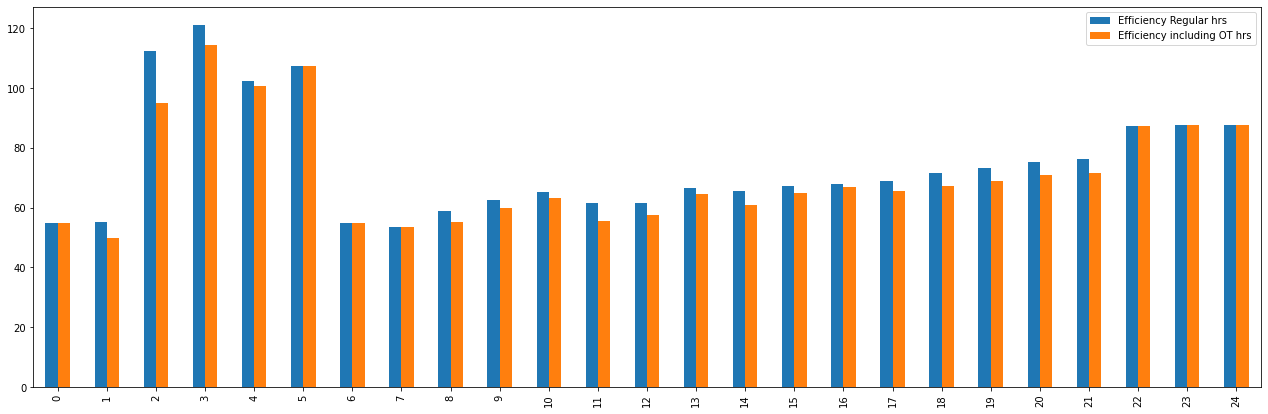

In [45]:
df3=df[['Efficiency Regular hrs','Efficiency including OT hrs']]
ax = df3.plot.bar(figsize=(22,7))